# Self-Driving Taxi using Advantage Actor Critic (A2C)

When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger’s location, picks up the passenger, drives to the passenger’s destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

<b>States</b> (Observation Space: 500 discrete states)
<br> 5 taxi starting locations (4 possible locations in the grid world + parking location)
<br> 5 passenger pickup locations (4 possible locations in the grid world + parking location)
<br> 5 taxi returing locations
<br> 4 passenger dropoff locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue)

So, this taxi environment has total possible states: 5x5x5x4=500 possible states.

<b>Actions</b> (Action Space: 6 discrete actions)
<br>0 = South
<br>1 = North
<br>2 = East
<br>3 = West
<br>4 = Pickup
<br>5 = Dropoff

<b>Reward</b>
<br> A high positive reward for a successful dropoff 
<br> A penality if the agent tries to drop off a passenger in wrong locations 
<br> A slight negative reward for not making it to the destination after every time-step to mimic the delay.

In [1]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy
import math
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

### Create the Taxi-v3 environment

In [2]:
env = make_vec_env("Taxi-v3", n_envs=1, seed=0)

print('Number of states:{}'.format(env.observation_space))
print('Number of actions:{}'.format(env.action_space))

Number of states:Discrete(500)
Number of actions:Discrete(6)


### Instantiate A2C agent and train the model

In [3]:
model = A2C(policy="MlpPolicy", env=env, verbose=True)
model.learn(total_timesteps=10000, progress_bar=True) 

Output()

Using cpu device


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -790     |
| time/                 |          |
|    fps                | 215      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.75    |
|    explained_variance | -0.143   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -8       |
|    value_loss         | 40.1     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -625     |
| time/                 |          |
|    fps                | 224      |
|    iterations         | 200      |
|    time_elapsed       | 4        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.65    |
|    explained_variance | 0.0276   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -3.58    |
|    value_loss         | 6.44     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -550     |
| time/                 |          |
|    fps                | 226      |
|    iterations         | 300      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1500     |
| train/                |          |
|    entropy_loss       | -1.45    |
|    explained_variance | 0.00669  |
|    learning_rate      | 0.0007   |
|    n_updates          | 299      |
|    policy_loss        | -3.19    |
|    value_loss         | 5.58     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 200      |
|    ep_rew_mean        | -464     |
| time/                 |          |
|    fps                | 228      |
|    iterations         | 400      |
|    time_elapsed       | 8        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -1.4     |
|    explained_variance | 0.00352  |
|    learning_rate      | 0.0007   |
|    n_updates          | 399      |
|    policy_loss        | -2.56    |
|    value_loss         | 4.82     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 192      |
|    ep_rew_mean        | -399     |
| time/                 |          |
|    fps                | 231      |
|    iterations         | 500      |
|    time_elapsed       | 10       |
|    total_timesteps    | 2500     |
| train/                |          |
|    entropy_loss       | -1.43    |
|    explained_variance | -0.0048  |
|    learning_rate      | 0.0007   |
|    n_updates          | 499      |
|    policy_loss        | -2.72    |
|    value_loss         | 4.24     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 193       |
|    ep_rew_mean        | -377      |
| time/                 |           |
|    fps                | 231       |
|    iterations         | 600       |
|    time_elapsed       | 12        |
|    total_timesteps    | 3000      |
| train/                |           |
|    entropy_loss       | -1.34     |
|    explained_variance | -0.000318 |
|    learning_rate      | 0.0007    |
|    n_updates          | 599       |
|    policy_loss        | -15.1     |
|    value_loss         | 54.2      |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 194      |
|    ep_rew_mean        | -350     |
| time/                 |          |
|    fps                | 233      |
|    iterations         | 700      |
|    time_elapsed       | 15       |
|    total_timesteps    | 3500     |
| train/                |          |
|    entropy_loss       | -1.41    |
|    explained_variance | 0.00357  |
|    learning_rate      | 0.0007   |
|    n_updates          | 699      |
|    policy_loss        | -1.81    |
|    value_loss         | 3.09     |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 195       |
|    ep_rew_mean        | -341      |
| time/                 |           |
|    fps                | 232       |
|    iterations         | 800       |
|    time_elapsed       | 17        |
|    total_timesteps    | 4000      |
| train/                |           |
|    entropy_loss       | -1.36     |
|    explained_variance | -0.000697 |
|    learning_rate      | 0.0007    |
|    n_updates          | 799       |
|    policy_loss        | -2.34     |
|    value_loss         | 2.59      |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 196      |
|    ep_rew_mean        | -323     |
| time/                 |          |
|    fps                | 234      |
|    iterations         | 900      |
|    time_elapsed       | 19       |
|    total_timesteps    | 4500     |
| train/                |          |
|    entropy_loss       | -1.39    |
|    explained_variance | -0.00138 |
|    learning_rate      | 0.0007   |
|    n_updates          | 899      |
|    policy_loss        | -1.6     |
|    value_loss         | 2.14     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 196      |
|    ep_rew_mean        | -316     |
| time/                 |          |
|    fps                | 235      |
|    iterations         | 1000     |
|    time_elapsed       | 21       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.46    |
|    explained_variance | 0.000194 |
|    learning_rate      | 0.0007   |
|    n_updates          | 999      |
|    policy_loss        | -1.59    |
|    value_loss         | 1.73     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 196      |
|    ep_rew_mean        | -306     |
| time/                 |          |
|    fps                | 235      |
|    iterations         | 1100     |
|    time_elapsed       | 23       |
|    total_timesteps    | 5500     |
| train/                |          |
|    entropy_loss       | -1.46    |
|    explained_variance | 0.00255  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1099     |
|    policy_loss        | -1.42    |
|    value_loss         | 1.36     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 197      |
|    ep_rew_mean        | -301     |
| time/                 |          |
|    fps                | 236      |
|    iterations         | 1200     |
|    time_elapsed       | 25       |
|    total_timesteps    | 6000     |
| train/                |          |
|    entropy_loss       | -1.31    |
|    explained_variance | -0.00019 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1199     |
|    policy_loss        | -0.929   |
|    value_loss         | 1.03     |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 197      |
|    ep_rew_mean        | -293     |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 1300     |
|    time_elapsed       | 27       |
|    total_timesteps    | 6500     |
| train/                |          |
|    entropy_loss       | -1.37    |
|    explained_variance | 0.00161  |
|    learning_rate      | 0.0007   |
|    n_updates          | 1299     |
|    policy_loss        | -1.19    |
|    value_loss         | 0.753    |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 197      |
|    ep_rew_mean        | -288     |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 1400     |
|    time_elapsed       | 29       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -1.26    |
|    explained_variance | 0.000341 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.854   |
|    value_loss         | 0.519    |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 197      |
|    ep_rew_mean        | -283     |
| time/                 |          |
|    fps                | 238      |
|    iterations         | 1500     |
|    time_elapsed       | 31       |
|    total_timesteps    | 7500     |
| train/                |          |
|    entropy_loss       | -1.34    |
|    explained_variance | -0.00016 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1499     |
|    policy_loss        | -0.713   |
|    value_loss         | 0.327    |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 197       |
|    ep_rew_mean        | -279      |
| time/                 |           |
|    fps                | 236       |
|    iterations         | 1600      |
|    time_elapsed       | 33        |
|    total_timesteps    | 8000      |
| train/                |           |
|    entropy_loss       | -1.24     |
|    explained_variance | -0.000301 |
|    learning_rate      | 0.0007    |
|    n_updates          | 1599      |
|    policy_loss        | -0.694    |
|    value_loss         | 0.179     |
-------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 198      |
|    ep_rew_mean        | -274     |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 1700     |
|    time_elapsed       | 35       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -1.27    |
|    explained_variance | -0.00015 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | -0.291   |
|    value_loss         | 0.0755   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 198      |
|    ep_rew_mean        | -271     |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 1800     |
|    time_elapsed       | 37       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -1.36    |
|    explained_variance | -8.2e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | -0.165   |
|    value_loss         | 0.0159   |
------------------------------------


------------------------------------
| rollout/              |          |
|    ep_len_mean        | 198      |
|    ep_rew_mean        | -268     |
| time/                 |          |
|    fps                | 237      |
|    iterations         | 1900     |
|    time_elapsed       | 39       |
|    total_timesteps    | 9500     |
| train/                |          |
|    entropy_loss       | -1.13    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1899     |
|    policy_loss        | -0.0166  |
|    value_loss         | 0.00021  |
------------------------------------


-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 198       |
|    ep_rew_mean        | -265      |
| time/                 |           |
|    fps                | 237       |
|    iterations         | 2000      |
|    time_elapsed       | 42        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -1.11     |
|    explained_variance | 0.00037   |
|    learning_rate      | 0.0007    |
|    n_updates          | 1999      |
|    policy_loss        | -0.000399 |
|    value_loss         | 1.41e-07  |
-------------------------------------


### Test and visualize

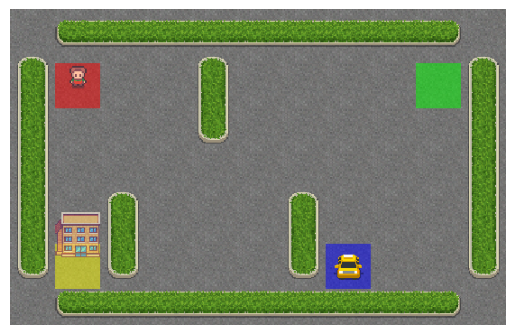

<Figure size 640x480 with 0 Axes>

In [4]:
images = []
ims = []
fig = plt.figure()
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
vec_env = model.get_env()
obs = vec_env.reset()
for i in range(200):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    state_img = vec_env.render("rgb_array")
    fig = plt.figure()
    plt.imshow(state_img)
    plt.axis('off')
    display(fig)
    images.append(fig)
    clear_output(wait=True)  # Clear the output for the next image

    plt.close()

display(fig)